In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv("Telco_Cust_Churn.csv")

In [4]:
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (some values might be empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values (TotalCharges may have NaNs now)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\anmol\AppData\Local\Temp\ipykernel_55804\80928518.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
# Encode Categorical Variables
# -------------------------------
# Separate categorical and numerical features
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns


# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
# Feature Scaling

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


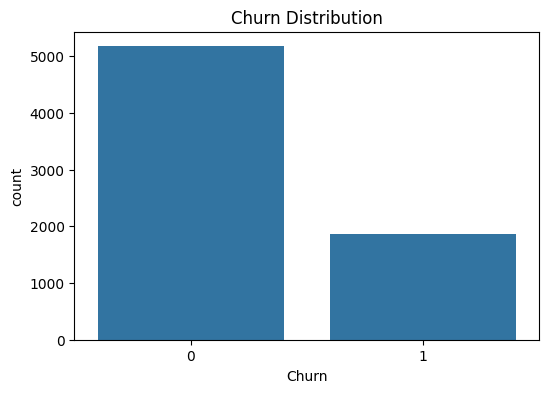

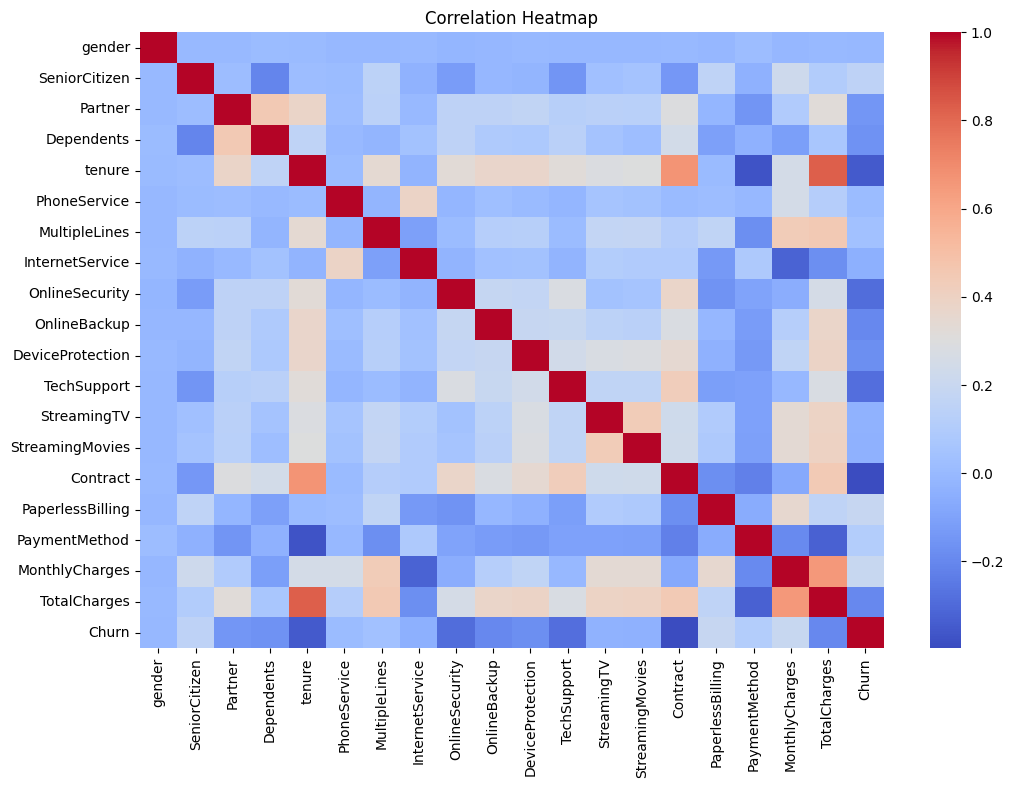

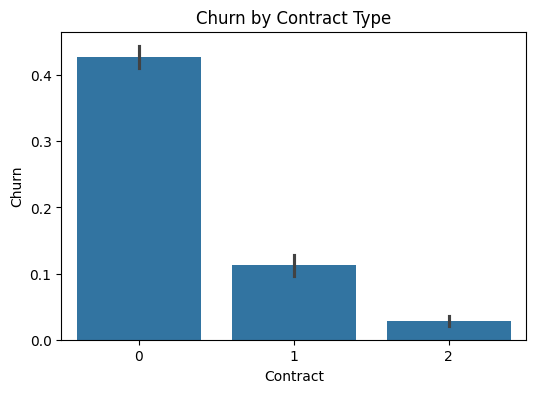

In [8]:
# Exploratory Data Analysis (EDA)
# -------------------------------
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Churn by Contract Type
plt.figure(figsize=(6,4))
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [10]:
# Define Features & Target
# -------------------------------
X = df.drop('Churn', axis=1)
y = df['Churn']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Baseline Model - Logistic Regression
# -------------------------------
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8395618589991992


In [13]:
# Random Forest Classifier
# -------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8234157431088377


In [14]:
# XGBoost Classifier
# -------------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))



XGBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC-AUC: 0.8320377689942907


# Feautures Importance

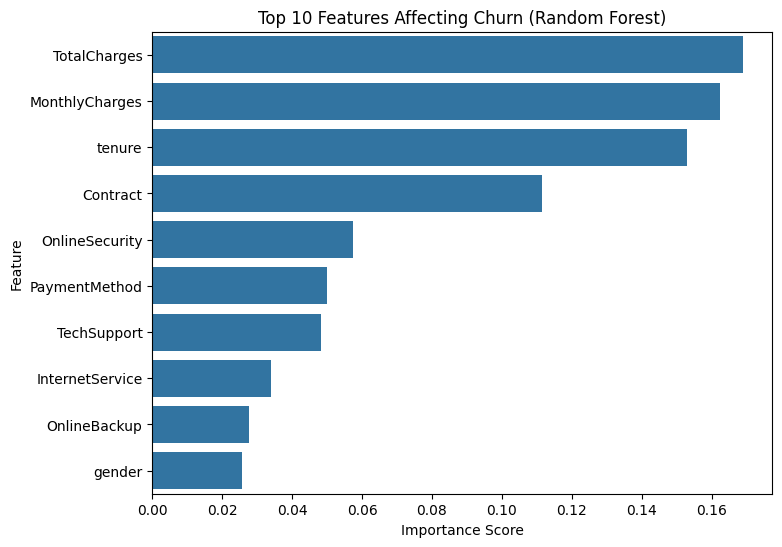


Top 10 Features (Random Forest):
TotalCharges       0.168876
MonthlyCharges     0.162405
tenure             0.152800
Contract           0.111343
OnlineSecurity     0.057415
PaymentMethod      0.050075
TechSupport        0.048130
InternetService    0.033865
OnlineBackup       0.027777
gender             0.025596
dtype: float64


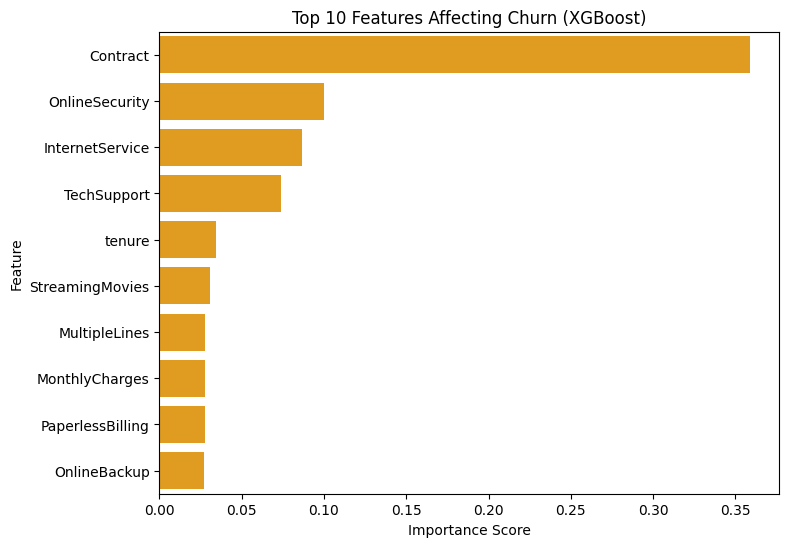


Top 10 Features (XGBoost):
Contract            0.358750
OnlineSecurity      0.100290
InternetService     0.086618
TechSupport         0.073649
tenure              0.034571
StreamingMovies     0.030846
MultipleLines       0.027948
MonthlyCharges      0.027803
PaperlessBilling    0.027607
OnlineBackup        0.027163
dtype: float32


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Random Forest Feature Importance
# -------------------------------
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances.head(10), y=rf_importances.head(10).index)
plt.title("Top 10 Features Affecting Churn (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nTop 10 Features (Random Forest):")
print(rf_importances.head(10))

# -------------------------------
# XGBoost Feature Importance
# -------------------------------
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=xgb_importances.head(10), y=xgb_importances.head(10).index, color="orange")
plt.title("Top 10 Features Affecting Churn (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nTop 10 Features (XGBoost):")
print(xgb_importances.head(10))


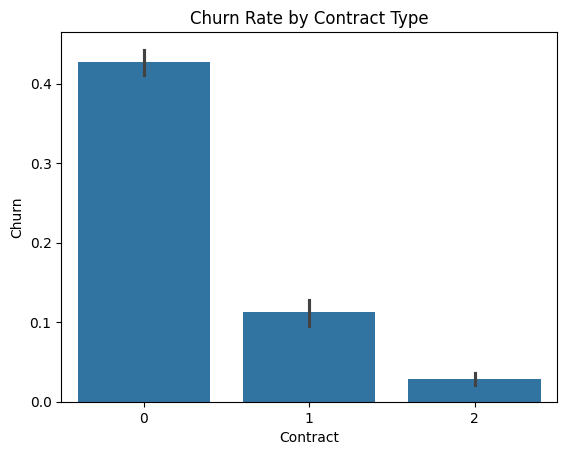

In [16]:
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

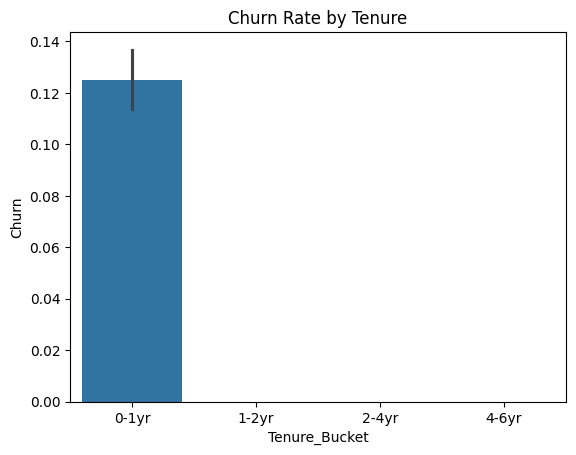

In [17]:
# Churn vs Tenure Buckets
df["Tenure_Bucket"] = pd.cut(df["tenure"], bins=[0,12,24,48,72], labels=["0-1yr","1-2yr","2-4yr","4-6yr"])
sns.barplot(x="Tenure_Bucket", y="Churn", data=df)
plt.title("Churn Rate by Tenure")
plt.show()

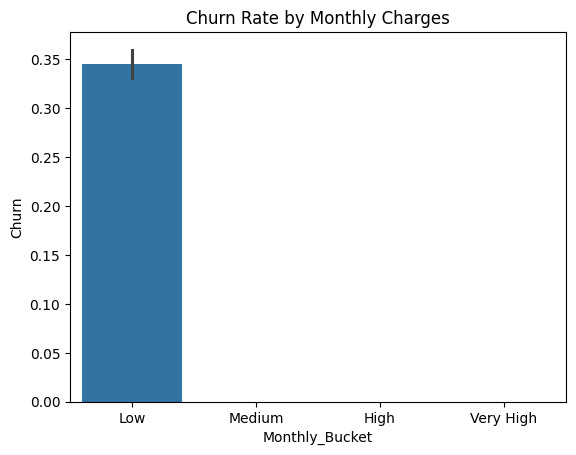

In [18]:
# Churn vs Monthly Charges
df["Monthly_Bucket"] = pd.cut(df["MonthlyCharges"], bins=[0,40,70,100,150], labels=["Low","Medium","High","Very High"])
sns.barplot(x="Monthly_Bucket", y="Churn", data=df)
plt.title("Churn Rate by Monthly Charges")
plt.show()